# Task 2

<b>Problem Statement:</b> We wish to predict Singapore's GDP growth rate amidst COVID-19 based on various factors. By comparing the predicted growth rate with the actual growth rate, we can determine the effectiveness of Singapore's coping strategies against COVID-19.

Factors/Variables to consider (from most to least important):
- Time/date (time series data)
- Vaccination rate
- Daily active cases (7 days moving average)
- Hospitalised
- Recovered
- Government grants/funding
- Phases (circuit breaker, phase 1 etc.)

Predict: 
- Growth rate of GDP

## Data Preprocessing

In [2]:
# importing all the required packages
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# preprocessing COVID-19 data for the features
# start from 1 Aug 2021 (first record of vaccination rate)
df = pd.read_excel('Covid-19 SG.xlsx', skiprows=range(1, 557))

# processing NaN values
df = df[pd.notnull(df['Phase'])]
df['Cumulative Individuals Vaccinated'] = df['Cumulative Individuals Vaccinated'].fillna(0)

sg_population = 5.686 * 10**6
df['Percentage Vaccinated'] = df['Cumulative Individuals Vaccinated'].divide(sg_population)

# convert to datetime object for easier processing
df['Date'] = pd.to_datetime(df['Date'])

# convert date to numerical value
df['Date'] = df['Date'].map(dt.datetime.toordinal)

# find 7 days Moving Average as another feature
df['7 days Moving Average'] = df['Daily Confirmed'].rolling(window=7).mean()

# replace NaN values
df['7 days Moving Average'].fillna(df['Daily Confirmed'], inplace=True)

# df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")


# getting useful columns
# new_columns = ['Date','Daily Confirmed', 'Still Hospitalised','Phase','7 days Moving Average','Percentage Vaccinated']
new_columns = ['Date', 'Still Hospitalised','Phase','7 days Moving Average', 'Percentage Vaccinated']
df = df.reindex(columns=new_columns)

df = df[new_columns]

In [4]:
# preprocessing SGX data for the target
sgx_df = pd.read_csv('./HistoricalPrices.csv', skipfooter=43)

# convert to datetime object for easier processing
sgx_df['Date'] = pd.to_datetime(sgx_df['Date'])

# convert date to numerical value and rename column
sgx_df['Date'] = sgx_df['Date'].map(dt.datetime.toordinal)
sgx_df = sgx_df.rename(columns={' Open':'STI Price'})

# narrowing down to just open instead of high, low and close
sgx_df = sgx_df[['Date','STI Price']]

# merge with dataset on date
merged_df = pd.merge(df,sgx_df, how='inner', on='Date')

merged_df

,Date,Still Hospitalised,Phase,7 days Moving Average,Percentage Vaccinated,STI Price
0,738004,572.0,Phase 2 (Heightened Alert),111.000000,0.758562,3176.42
1,738005,562.0,Phase 2 (Heightened Alert),102.000000,0.759976,3149.25
2,738006,525.0,Phase 2 (Heightened Alert),95.000000,0.761512,3154.60
3,738007,547.0,Phase 2 (Heightened Alert),98.000000,0.762820,3186.65
4,738008,516.0,Phase 2 (Heightened Alert),97.000000,0.764014,3175.00
5,738012,478.0,Preparatory Stage,82.142857,0.769179,3187.53
6,738013,478.0,Preparatory Stage,77.571429,0.770952,3204.76
7,738014,440.0,Preparatory Stage,72.000000,0.772724,3190.23
8,738015,458.0,Preparatory Stage,65.142857,0.774289,3167.03
9,738018,396.0,Preparatory Stage,55.571429,0.779473,3139.23


In [ ]:
# saved merged_df as a csv file
new_df.to_csv('./output/processed_data.csv',index=False)

## Data Visualisation

In [5]:
# get the dataset
df = pd.read_csv(r'./output/processed_data.csv')

### Pair plot

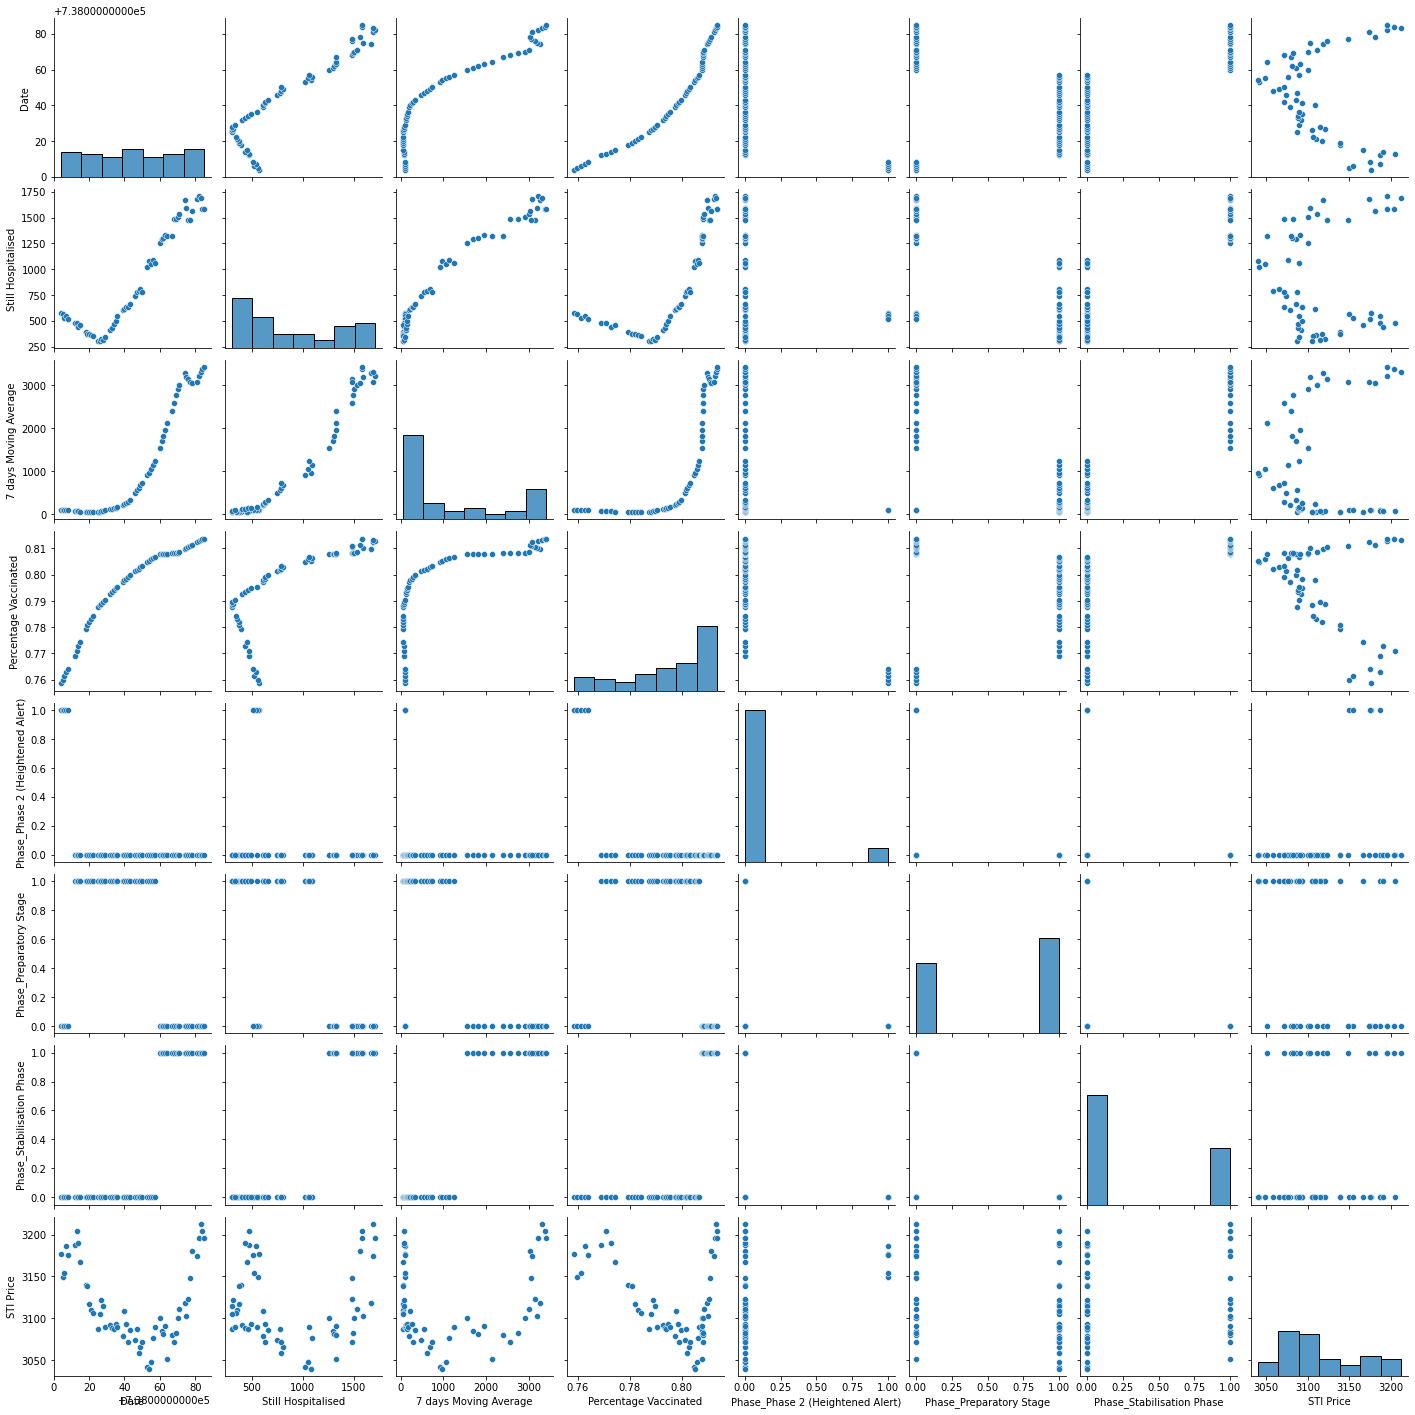

In [6]:
pp = sns.pairplot(data=df)